In [32]:
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib 
import numpy as np
import pandas as pd
import copy

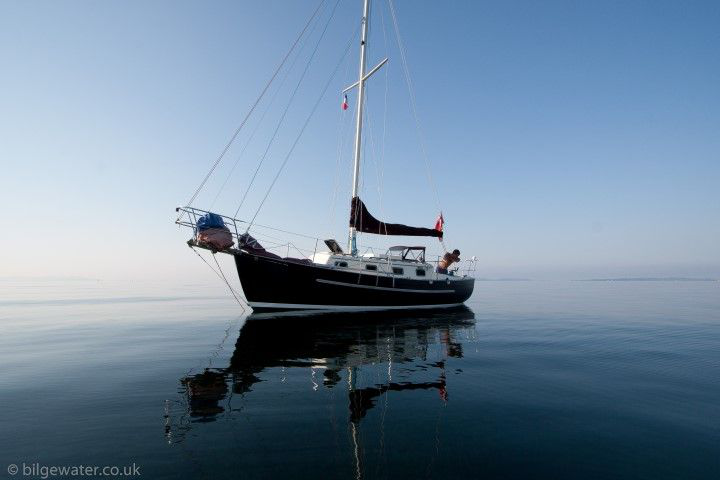

In [33]:
img_rgb = Image.open('C:/Users/ASUS/Documents/Semester 9/CV/GUC_571_58_25782_2022-11-10T19_05_53 (1)/sample_image.jpg')
img_rgb

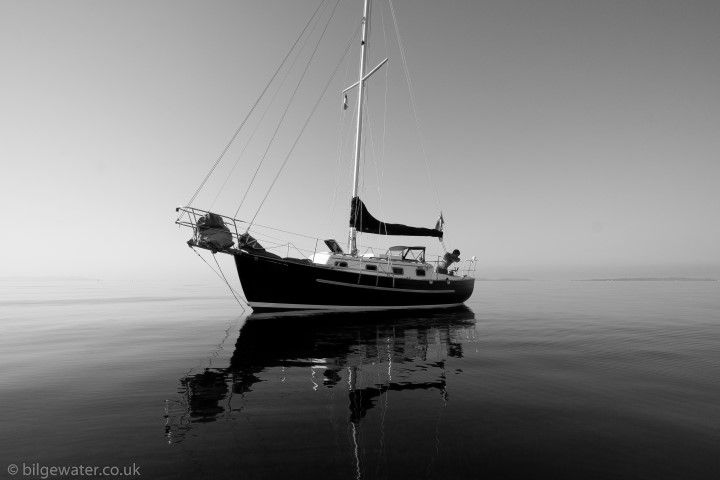

In [34]:
img_gray = img_rgb.convert('L')
img_gray.save('gray_image.jpg')
img_gray

In [35]:
def toArrayAndSquare(im):
  img = [[0 for x in range(im.size[0])] for y in range(im.size[1])]
  sqr = [[0 for x in range(im.size[0])] for y in range(im.size[1])]
  for i in range (0,im.size[0]):
    for j in range (0,im.size[1]):
      img[j][i] = im.getpixel((i,j))
      sqr[j][i] = img[j][i] ** 2
  return img,sqr

In [36]:
greyscaleimage = img_rgb.convert('L')

In [37]:
def toArray(im):
  img = [[0 for x in range(im.size[0])] for y in range(im.size[1])]
  sqr = [[0 for x in range(im.size[0])] for y in range(im.size[1])]
  for i in range (0,im.size[0]):
    for j in range (0,im.size[1]):
      img[j][i] = im.getpixel((i,j))
      sqr[j][i] = img[j][i] * 2
  return img

In [38]:
imageArray = toArray(greyscaleimage)

In [39]:
img = [[0 for x in range(256)] for y in range(256)]
img2 = [[0 for x in range(256)] for y in range(256)] 

In [40]:
def calculateCooccurrence(imageArray):
    count = len(imageArray)
    for i in range (0, count-1):
        for j in range (0, count):
            img[imageArray[i][j]][imageArray[i+1][j]] += 1
            
    for i in range (0, count):
        for j in range (0, count-1):
            img2[imageArray[i][j]][imageArray[i][j+1]] += 1
    return img, img2

In [ ]:
#Time and space complexity of calculateCooccurrence(imageArray) is n*m where n is number of rows and m is number of columns 

In [41]:
img, img2 = calculateCooccurrence(imageArray)

In [42]:
def nullifyPixels(im):
    count = len(im)
    for i in range (0, count):
        for j in range (0, count):
            if(abs(i - j) < 30 ):
                im[i][j] = 0
    return im

In [43]:
#Time and space complexity of nullifyPixels(im) is n*m where n is number of rows and m is number of columns

In [44]:
nimg = copy.deepcopy(img)
nimg2 = copy.deepcopy(img2)
nullifyPixelsImg1 =  nullifyPixels(nimg)
nullifyPixelsImg2 =  nullifyPixels(nimg2)

In [45]:
def imgWithCooccurrence(nullifyPixelsImg1, nullifyPixelsImg2):
    output = [[0 for x in range(greyscaleimage.size[0])] for y in range(greyscaleimage.size[1])]
    output = np.array(output)
    imageArray1 = np.array(imageArray)
    for i in range (0, imageArray1.shape[0]-1):
        for j in range (0, imageArray1.shape[1]-1):
            if(nullifyPixelsImg1[imageArray1[i][j]][imageArray1[i+1][j]] > 0 or nullifyPixelsImg2[imageArray1[i][j]][imageArray1[i][j+1]] > 0):
                output[i][j] = 255
    return output        

In [ ]:
#Time and space complexity of imgWithCooccurrence(nullifyPixelsImg1, nullifyPixelsImg2) is n*m where n is number of rows and m is number of columns

In [46]:
output = imgWithCooccurrence(nullifyPixelsImg1, nullifyPixelsImg2)

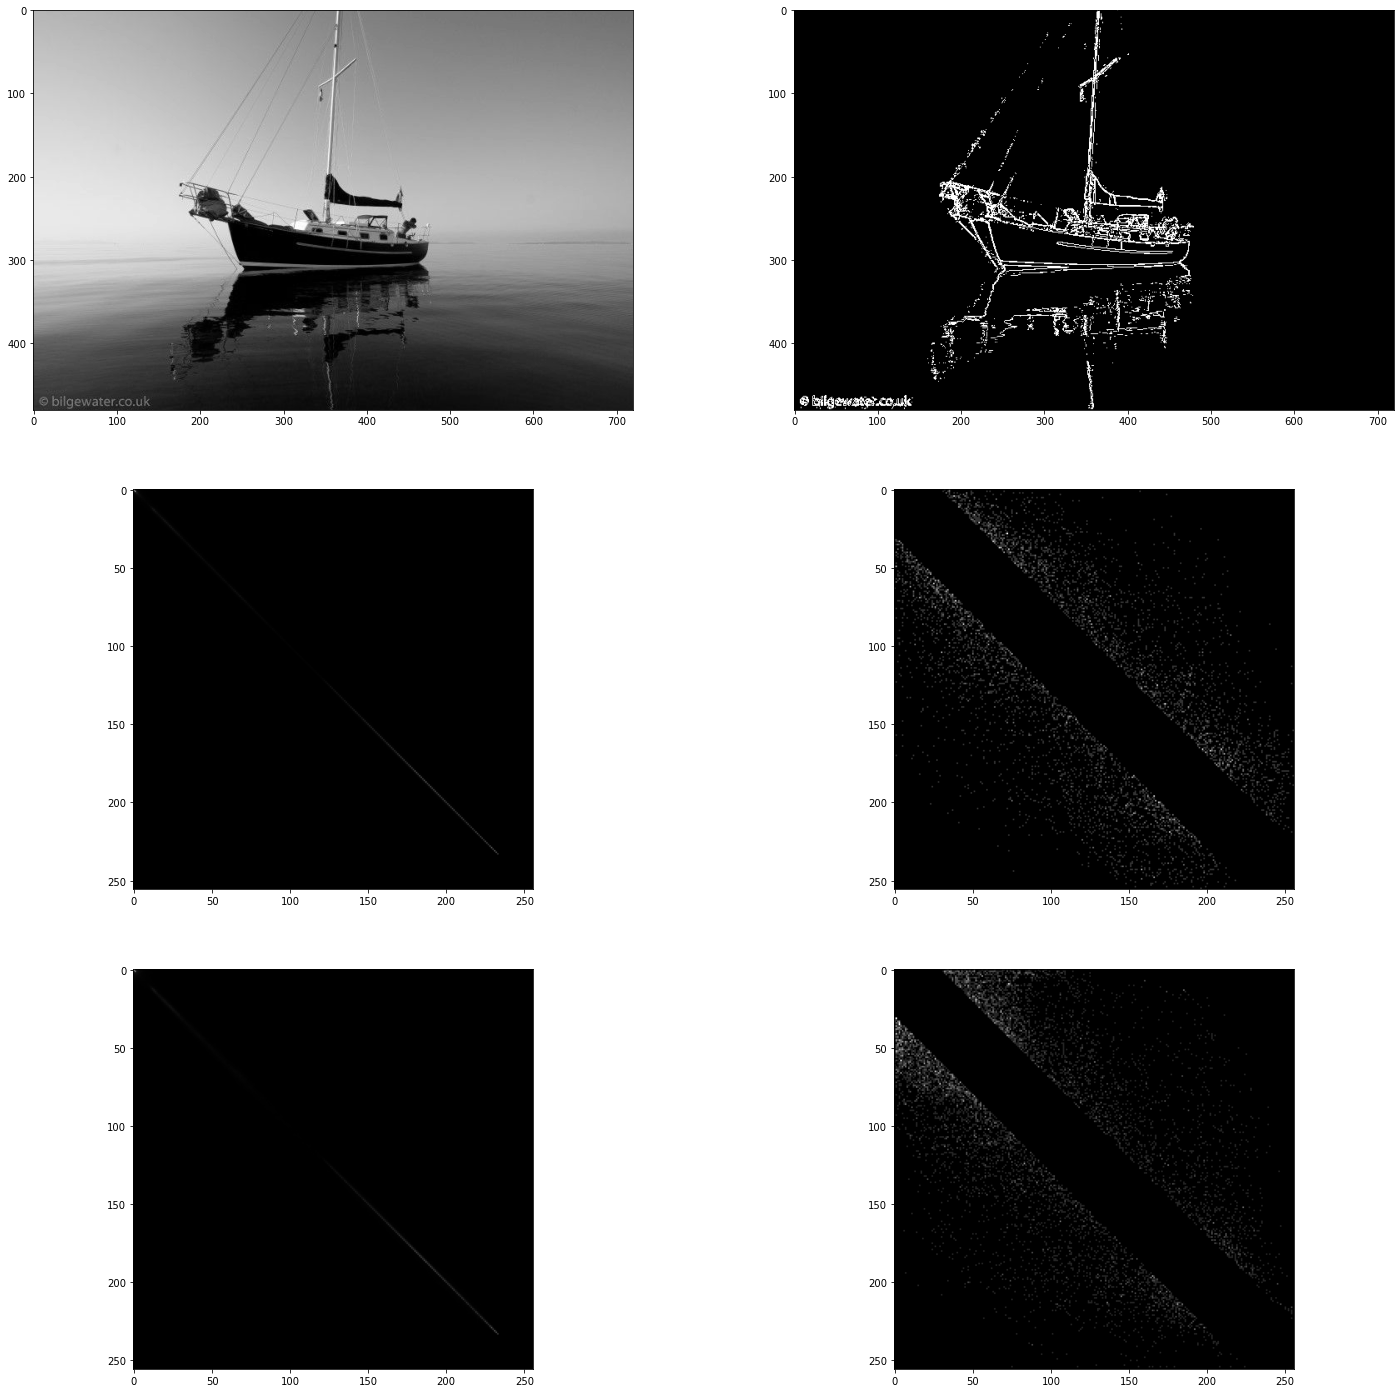

In [47]:
#plt has to be imported, see the previous sections
plt.subplots(nrows=3, ncols=2, figsize=(25, 25))

plt.subplot(3,2,1)
plt.imshow(greyscaleimage,  cmap = 'gray')

plt.subplot(3,2,2)
plt.imshow(output,  cmap = 'gray')

plt.subplot(3,2,3)
plt.imshow(img2,  cmap = 'gray')

plt.subplot(3,2,4)
plt.imshow(nullifyPixelsImg2,  cmap = 'gray') 

plt.subplot(3,2,5)
plt.imshow(img,  cmap = 'gray')

plt.subplot(3,2,6)
plt.imshow(nullifyPixelsImg1,  cmap = 'gray')

In [ ]:
# Time and space complexity of task 1 is n*m, where n is number of rows and m is number of columns

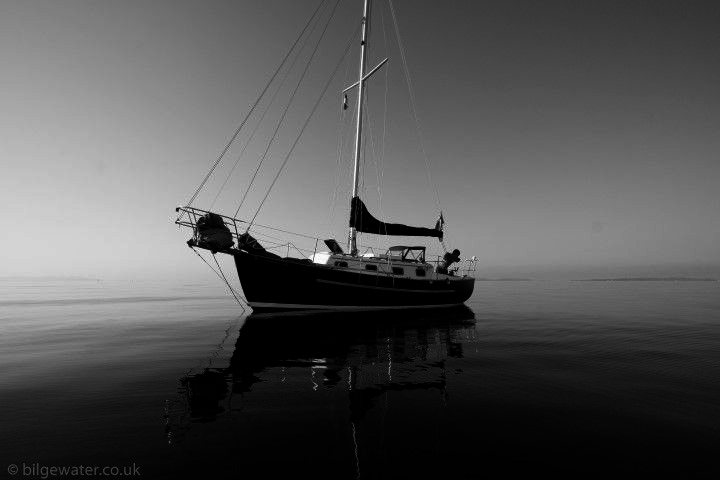

In [48]:
img,sqr=toArrayAndSquare(img_gray)
array = np.array(sqr, dtype=np.uint16)
new_image = Image.fromarray(array)
new_image

gray image= img_gray 

image in array format: img, sqr

In [49]:
rows = len(img)
print(rows)  
cols = len(img[0])
print(cols)

480
720


In [50]:
def integralArray(image):
    s_integral_image=[[0 for i in range(cols)] for j in range(rows)]
    for i in range(rows):
        for j in range(cols):
            if j==0:
                s_integral_image[i][j]=image[i][j]
            else:
                s_integral_image[i][j]=s_integral_image[i][j-1]+image[i][j]

    ii_integral_image= [[0 for i in range(cols)] for j in range(rows)]
    for i in range(rows):
        for j in range(cols):
            if i==0:
                ii_integral_image[i][j]=s_integral_image[i][j]
            else:
                ii_integral_image[i][j]=ii_integral_image[i-1][j]+s_integral_image[i][j]
    return ii_integral_image

In [ ]:
#Time and space complexity of integralArray(image) is n*m where n is number of rows and m is number of columns

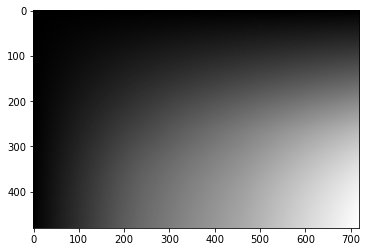

In [51]:
plt.imshow(integralArray(img),  cmap = 'gray')

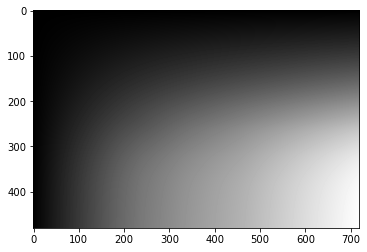

In [52]:
plt.imshow(integralArray(sqr),  cmap = 'gray')

In [53]:
print(np.matrix(integralArray(img)))

[[     181      362      543 ...   100248   100359   100470]
 [     362      724     1086 ...   200650   200872   201094]
 [     544     1088     1632 ...   301254   301587   301920]
 ...
 [   86558   173068   259533 ... 45001745 45060210 45118660]
 [   86613   173178   259698 ... 45017821 45076312 45134789]
 [   86666   173284   259858 ... 45033403 45091920 45150424]]


In [54]:
def localSum(integral_img,TL,BR):
  TR=(TL[0],BR[1])
  BL=(BR[0],TL[1])
  #integral_img=integralArray(image)
  BR_val=integral_img[BR[0]][BR[1]]
  BL_val=integral_img[BL[0]][BL[1]-1]
  TR_val=integral_img[TR[0]-1][TR[1]]
  TL_val=integral_img[TL[0]-1][TL[1]-1]
  if TL==(0,0):
    sum=BR_val
  elif TL[0]==0:
    sum=BR_val-BL_val
  elif TL[1]==0:
    sum=BR_val-TR_val
  else:
   sum=BR_val+TL_val-TR_val-BL_val
  return sum

In [ ]:
#Time and space complexity of localSum(integral_img,TL,BR) is a constant

In [55]:
localSum(integralArray(img),(1,1),(3,3))

1635

In [56]:
TL=(0,0)
if TL ==(0,0):
  print("ff")

ff


In [57]:
localSum(np.pad(img,1),(0,0),(2,2))
np.pad(img,1)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 181, 181, ..., 111, 111,   0],
       [  0, 181, 181, ..., 111, 111,   0],
       ...,
       [  0,  55,  55, ...,  26,  27,   0],
       [  0,  53,  53, ...,  26,  27,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [58]:
def imgWithIntegral(image,window_size):
  img,sqr=toArrayAndSquare(image)
  rows = len(img)
  cols = len(img[0])
  N=window_size**2
  WD=window_size//2
  variance_image=[[0 for i in range(cols)] for j in range(rows)]
  integral_img=integralArray(img)
  integral_sqr=integralArray(sqr)
  for i in range(WD,rows-WD):
    for j in range(WD,cols-WD):
      result=localSum(integral_img,(i-WD,j-WD),(i+WD,j+WD))
      result_squ=localSum(integral_sqr,(i-WD,j-WD),(i+WD,j+WD))
      variance=(result_squ/N)-(result/N)**2
      if variance<0:
        variance=0
      variance_image[i][j]=variance

  return variance_image

In [ ]:
#Time and space complexity of imgWithIntegral(image,window_size) is n*m where n is number of rows and m is number of columns

In [59]:
final_img=imgWithIntegral(img_gray,3)
#print(np.matrix(final_img))


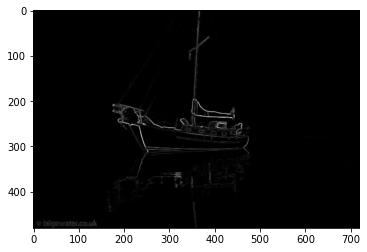

In [60]:
plt.imshow(imgWithIntegral(img_gray,3),  cmap = 'gray')

In [61]:
def applyThreshold (im, th):
  res = [[0 for x in range(len(im[0]))] for y in range(len(im))]
  for i in range (0,len(im)):
    for j in range (0,len(im[0])):
      if(im[i][j]<th):
        res[i][j] = 0
      else:
        res[i][j] = 255
  return res

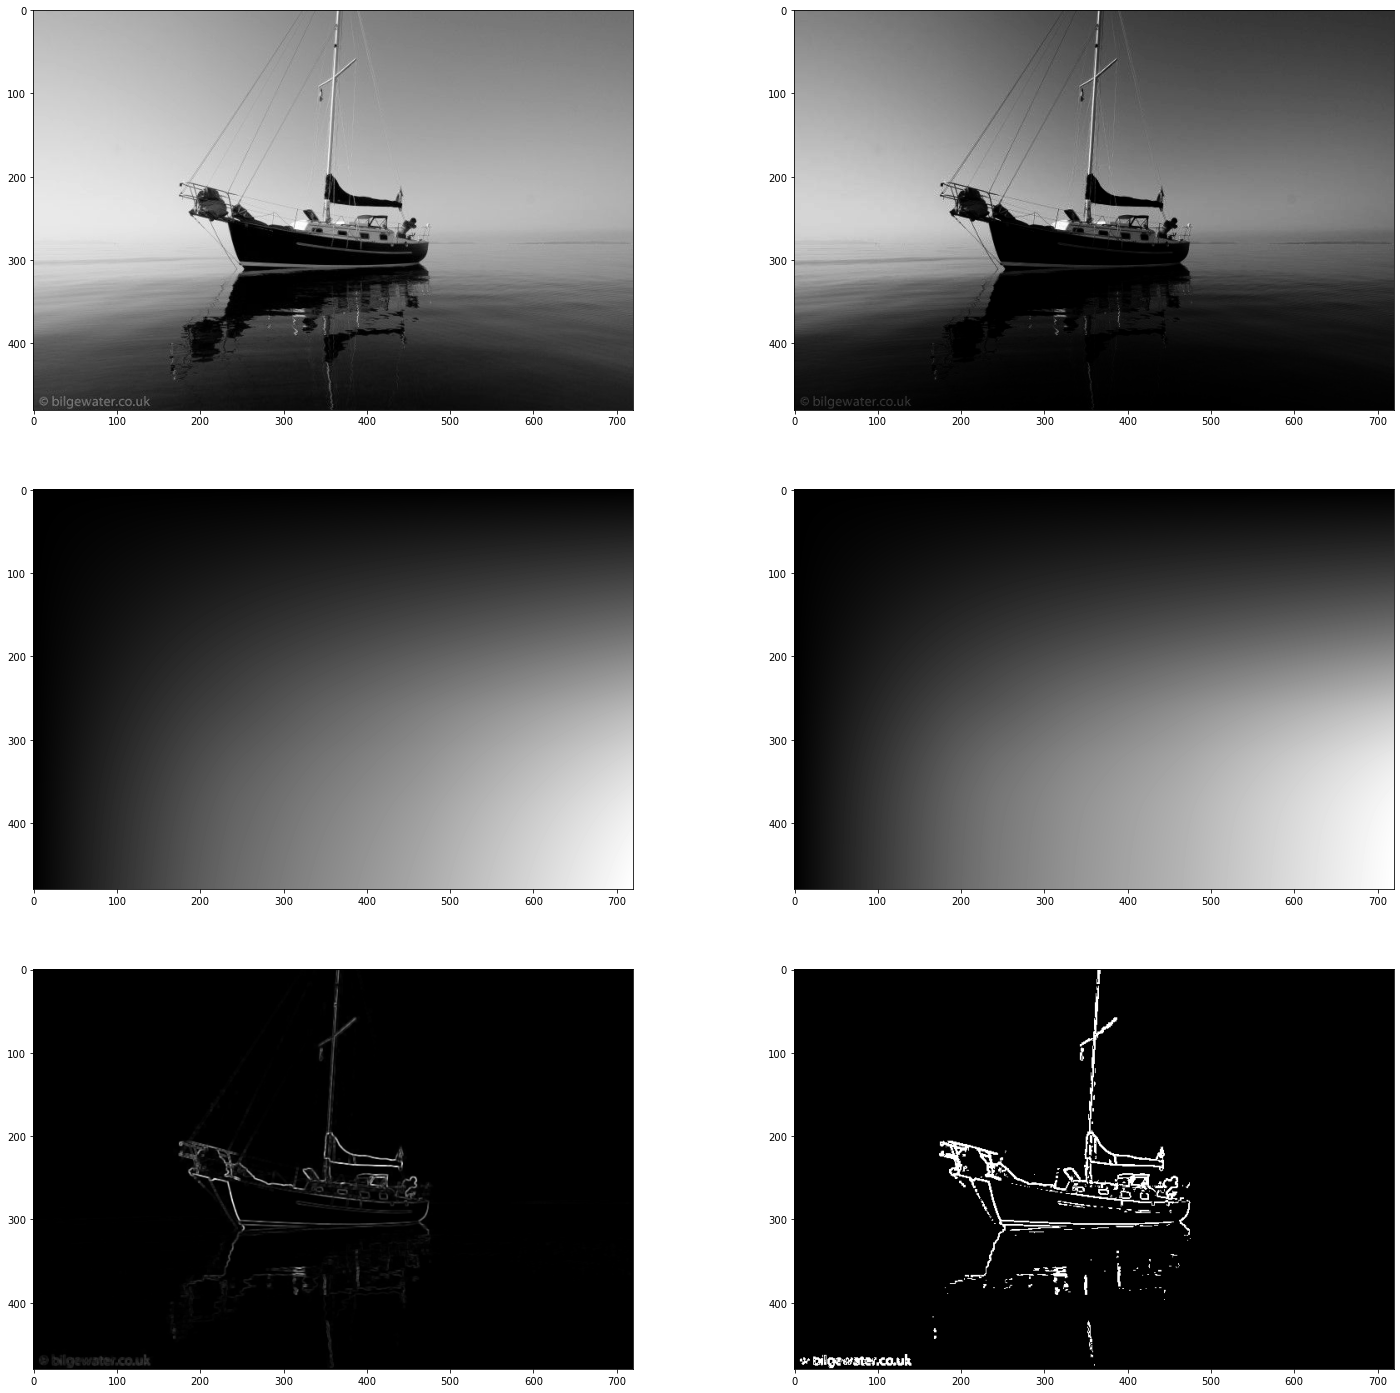

In [62]:

#plt has to be imported, see the previous sections
plt.subplots(nrows=3, ncols=2, figsize=(25, 25))

plt.subplot(3,2,1)
plt.imshow(img,  cmap = 'gray')

plt.subplot(3,2,2)
plt.imshow(sqr,  cmap = 'gray')

plt.subplot(3,2,3)
plt.imshow(integralArray(img),  cmap = 'gray')

plt.subplot(3,2,4)
plt.imshow(integralArray(sqr),  cmap = 'gray')

plt.subplot(3,2,5)
plt.imshow(final_img,  cmap = 'gray')

plt.subplot(3,2,6)
plt.imshow(applyThreshold (final_img, 750),  cmap = 'gray')

In [ ]:
# Time and space complexity of task 2 is also n*m
# both tasks have the same complexity, however, the output image from task 1 is better than task2
# in detecting the edges and showing more details because we take a window size in task 2 (integral), however, the output image from task 1 is pixelated beacuse it finds the relation between each edge  

Task 2

time complexity is O(n*m)

variance measures the homoginious